In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('Fraud_check.csv')

In [3]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

In [4]:
# Create the binary target variable 'Taxable_Income_Category'
threshold = 30000
data_encoded['Taxable_Income_Category'] = data_encoded['Taxable.Income'].apply(lambda x: 'Risky' if x <= threshold else 'Good')

In [5]:
# Select independent variables and target variable
X = data_encoded.drop(['Taxable.Income', 'Taxable_Income_Category'], axis=1)
y = data_encoded['Taxable_Income_Category']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Build the decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


In [10]:
# You can also print other evaluation metrics if needed
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.78      0.81      0.79        94
       Risky       0.18      0.15      0.17        26

    accuracy                           0.67       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.65      0.67      0.66       120

[[76 18]
 [22  4]]


In [11]:
### data visualisation
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

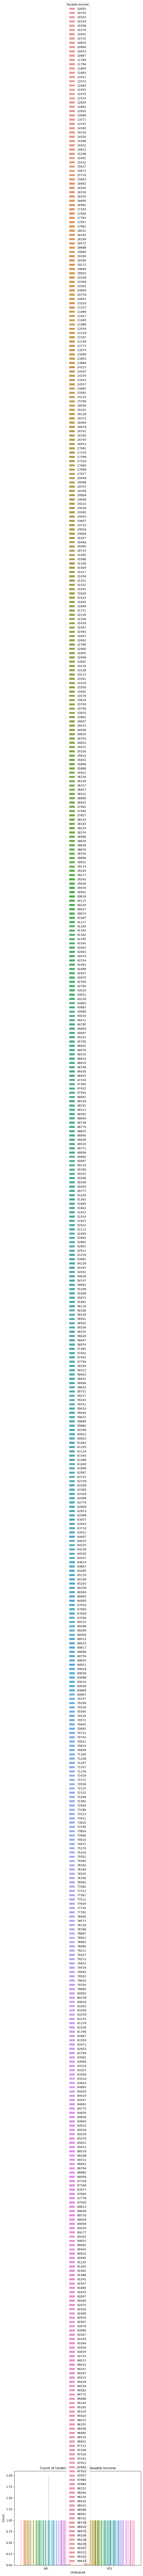

In [12]:
# Countplot for 'Undergrad'
plt.figure(figsize=(8, 6))
sns.countplot(x='Undergrad', data=data, hue='Taxable.Income')
plt.title('Count of Undergraduates by Taxable Income')
plt.xlabel('Undergrad')
plt.ylabel('Count')
plt.show()

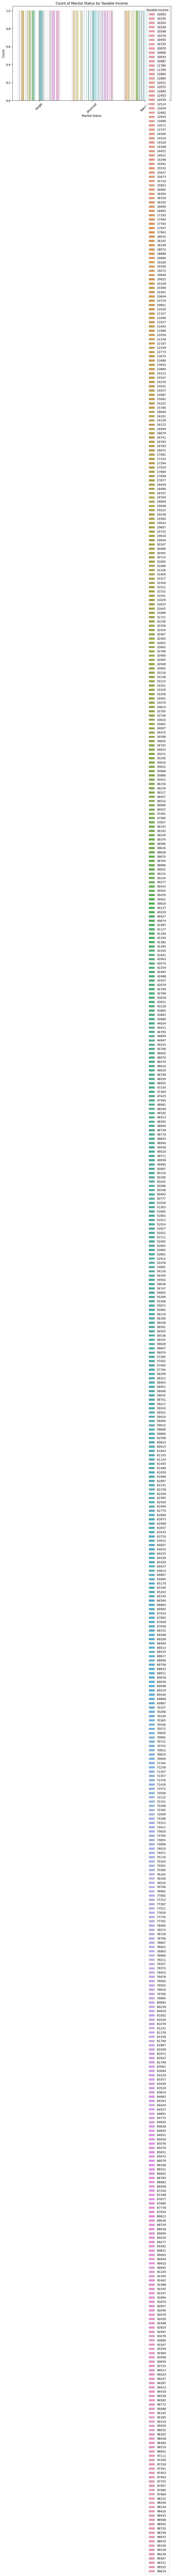

In [13]:
# Countplot for 'Marital.Status'
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital.Status', data=data, hue='Taxable.Income')
plt.title('Count of Marital Status by Taxable Income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
